In [517]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from pathlib import Path
import pandas as pd
from latex_formater import get_final_answer

save_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/').expanduser()

# load the results and combine them back into a single dataframe
results = pd.concat([
    pd.read_json(save_path / f)
    for f in save_path.iterdir()
    if f.suffix == '.json'
])
results['dataset'].unique()

array(['Counting_and_Probability_train', 'Number_Theory_train',
       'Intermediate_Algebra_train', 'Prealgebra_train',
       'Precalculus_train', 'Geometry_train', 'Algebra_train'],
      dtype=object)

In [518]:
print(f'Loaded {len(results)} results')

results.iloc[0]

Loaded 75000 results


dataset                               Counting_and_Probability_train
i                                                                  0
problem              What is the value of $9^3 + 3(9^2) + 3(9) + 1$?
level                                                        Level 1
type                                          Counting & Probability
solution           The given expression is the expansion of $(9+1...
boxed                                                           1000
model                                                    Llama-2-13b
method                                                autoregressive
prediction          Sure! Here's the calculation:\n\n$9^3 = 9 \ti...
generation_args    {'debug': False, 'seed': None, 'model': 'meta-...
Name: 0, dtype: object

In [519]:
boxed_match_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/BoxedMatch').expanduser()
comet_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/COMET').expanduser()
tf_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/TF').expanduser()
# roscoe_path = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/ROSCOE').expanduser()

In [520]:
import pickle

with open(boxed_match_path / 'results.pkl', 'rb') as f:
    boxed_match = pickle.load(f)

with open(comet_path / 'Unbabel_XCOMET-XL.pkl', 'rb') as f:
    xcomet = pickle.load(f)

tf = pd.concat([
    pd.read_json(tf_path / f)
    for f in tf_path.iterdir()
    if f.suffix == '.json'
])

In [521]:
# expand out the dictionary to columns
tf = pd.concat([
    tf.drop(columns='prediction'),
    tf['prediction'].apply(pd.Series)
], axis=1)
tf['model'].unique()

array(['Mixtral-8x22b-Instruct-v0.1', 'Gemma-1.1-7b-Instruct',
       'LLeMMA-34b', 'Abel-7b', 'Llama-2-13b', 'LLeMMA-7b',
       'Mixtral-8x22b-v0.1', 'Deepseek-7b-Instruct', 'Gemma-7b-Instruct',
       'Deepseek-67b', 'Meta-Llama-3-8b-Instruct',
       'Mistral-7b-Instruct-v0.2', 'Llama-2-70b', 'Llama-2-7b',
       'Mixtral-8x7b-Instruct-v0.1', 'Deepseek-7b-RL',
       'Meta-Llama-3-70b-Instruct'], dtype=object)

In [522]:
roscoe_path_a = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/temp').expanduser()

# open all pickle files in the directory
roscoe = {}
for f in roscoe_path_a.iterdir():
    if f.suffix == '.pkl':
        with open(f, 'rb') as file:
            roscoe[f.stem] = pickle.load(file)

roscoe_path_b = Path('~/GitHub/gold-ai-olympiad/data/MATH/Predictions/tempz').expanduser()
for f in roscoe_path_b.iterdir():
    if f.suffix == '.pkl':
        with open(f, 'rb') as file:
            roscoe[f.stem] = pickle.load(file)

In [523]:
results.groupby('dataset').count()

,i,problem,level,type,solution,boxed,model,method,prediction,generation_args
dataset,,,,,,,,,,
Algebra_train,17440,17440,17440,17440,17440,17440,17440,17440,17174,17440
Counting_and_Probability_train,7710,7710,7710,7710,7710,7710,7710,7710,7611,7710
Geometry_train,8700,8700,8700,8700,8700,8700,8700,8700,8612,8700
Intermediate_Algebra_train,12950,12950,12950,12950,12950,12950,12950,12950,12721,12950
Number_Theory_train,8690,8690,8690,8690,8690,8690,8690,8690,8473,8690
Prealgebra_train,12050,12050,12050,12050,12050,12050,12050,12050,11940,12050
Precalculus_train,7460,7460,7460,7460,7460,7460,7460,7460,7388,7460


In [524]:
[(k, len(x)) for k, x in roscoe['Algebra_train'].items()]

[('faithfulness', 17440),
 ('informativeness_step', 17440),
 ('informativeness_chain', 17440),
 ('faithfulness_ww', 17440),
 ('repetition_word', 17440),
 ('repetition_step', 17440),
 ('reasoning_alignment', 17440),
 ('external_hallucination', 17440),
 ('redundancy', 17440),
 ('common_sense_error', 17440),
 ('missing_step', 17440),
 ('semantic_coverage_step', 17440),
 ('semantic_coverage_chain', 17440),
 ('discourse_representation', 17440),
 ('coherence_step_vs_step', 17440),
 ('perplexity_step', 17440),
 ('perplexity_chain', 17440),
 ('perplexity_step_max', 17440),
 ('grammar_step', 17440),
 ('grammar_step_max', 17440)]

In [525]:
# convert roscoe to a dataframe with the dataset as a column
roscoe_df = pd.concat([
    pd.DataFrame({
        'dataset': [dataset] * len(data['faithfulness']),
        **{k: v for k, v in data.items() if len(v) == len(data['faithfulness'])}
    })
    for dataset, data in roscoe.items()
])
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,missing_step,semantic_coverage_step,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,Intermediate_Algebra_train,0.866672,0.883936,0.926820,0.940142,0.007688,0.021443,0.837015,0.950049,0.817315,...,0.800046,0.899828,0.912081,0.038860,0.132064,0.006257,0.435875,2.630440e-05,0.691396,0.393945
1,Intermediate_Algebra_train,0.787936,0.792745,0.880210,0.919622,0.089928,0.120155,0.850792,0.967151,0.842138,...,0.769829,0.978564,0.924528,0.976061,0.979162,0.143243,0.333758,5.214633e-03,0.891017,0.840735
2,Intermediate_Algebra_train,0.794181,0.827046,0.954842,0.926436,0.027937,0.106478,0.852607,0.958546,0.800642,...,0.795738,0.972319,0.947195,0.882636,0.610345,0.039236,0.365567,3.332583e-04,0.962997,0.916651
3,Intermediate_Algebra_train,0.713829,0.760838,0.952237,0.936189,0.004424,0.057520,0.902177,0.953419,0.797390,...,0.799127,0.947329,0.957362,0.512222,0.960494,0.112149,0.351688,4.100295e-03,0.937511,0.834631
4,Intermediate_Algebra_train,0.838457,0.834677,0.939746,0.916141,0.022885,0.036429,0.846742,0.965180,0.834436,...,0.701280,0.928044,0.951724,0.491835,0.442974,0.000419,0.285289,7.178172e-07,0.850640,0.770517


In [526]:
# add ['dataset', 'model', 'i'] from results to roscoe_df
# roscoe_df['model'] = results['model'].values
# roscoe_df['i'] = results['i'].values
# roscoe_df.head()
# the datasets are out of order, so we need to add model, i by matching the dataset name
paired = roscoe_df.groupby('dataset').apply(lambda x: results[results['dataset'] == x.name])

roscoe_df['model'] = paired['model'].values
roscoe_df['i'] = paired['i'].values
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,model,i
0,Intermediate_Algebra_train,0.866672,0.883936,0.926820,0.940142,0.007688,0.021443,0.837015,0.950049,0.817315,...,0.912081,0.038860,0.132064,0.006257,0.435875,2.630440e-05,0.691396,0.393945,Llama-2-13b,0
1,Intermediate_Algebra_train,0.787936,0.792745,0.880210,0.919622,0.089928,0.120155,0.850792,0.967151,0.842138,...,0.924528,0.976061,0.979162,0.143243,0.333758,5.214633e-03,0.891017,0.840735,Deepseek-7b-Instruct,0
2,Intermediate_Algebra_train,0.794181,0.827046,0.954842,0.926436,0.027937,0.106478,0.852607,0.958546,0.800642,...,0.947195,0.882636,0.610345,0.039236,0.365567,3.332583e-04,0.962997,0.916651,Deepseek-67b,0
3,Intermediate_Algebra_train,0.713829,0.760838,0.952237,0.936189,0.004424,0.057520,0.902177,0.953419,0.797390,...,0.957362,0.512222,0.960494,0.112149,0.351688,4.100295e-03,0.937511,0.834631,Meta-Llama-3-8b-Instruct,0
4,Intermediate_Algebra_train,0.838457,0.834677,0.939746,0.916141,0.022885,0.036429,0.846742,0.965180,0.834436,...,0.951724,0.491835,0.442974,0.000419,0.285289,7.178172e-07,0.850640,0.770517,Mistral-7b-Instruct-v0.2,0


In [527]:
# flatten xcomet with xcomet.metadata
xcomet_flat = {}
for key, value in xcomet.items():
    if key == 'metadata':
        continue
    xcomet_flat[key] = value

for key, value in xcomet['metadata'].items():
    xcomet_flat[key] = value

xcomet_flat.keys()

dict_keys(['scores', 'system_score', 'src_scores', 'ref_scores', 'unified_scores', 'mqm_scores', 'error_spans'])

In [528]:
xcomet_df = pd.DataFrame(xcomet_flat)
xcomet_df.head()

,scores,system_score,src_scores,ref_scores,unified_scores,mqm_scores,error_spans
0,0.169693,0.209593,0.208982,0.268453,0.169774,0.0,"[{'text': 'Sur', 'confidence': 0.2892259657382..."
1,0.077614,0.209593,-0.006511,0.204110,0.033452,0.0,"[{'text': 'breaks', 'confidence': 0.3561324477..."
2,0.157079,0.209593,0.139934,0.259296,0.165817,0.0,"[{'text': 'b', 'confidence': 0.298388421535491..."
3,0.136118,0.209593,0.114540,0.214367,0.156461,0.0,"[{'text': 'pieces', 'confidence': 0.3202254176..."
4,0.176640,0.209593,0.032416,0.325592,0.197892,0.0,"[{'text': 'b', 'confidence': 0.295559883117675..."


In [529]:
results['dataset']

0        Counting_and_Probability_train
1        Counting_and_Probability_train
2        Counting_and_Probability_train
3        Counting_and_Probability_train
4        Counting_and_Probability_train
                      ...              
17435                     Algebra_train
17436                     Algebra_train
17437                     Algebra_train
17438                     Algebra_train
17439                     Algebra_train
Name: dataset, Length: 75000, dtype: object

In [530]:
# add ['dataset', 'model', 'i'] from results to xcomet_df
xcomet_df['dataset'] = results['dataset'].values
xcomet_df['model'] = results['model'].values
xcomet_df['i'] = results['i'].values
xcomet_df.head()

,scores,system_score,src_scores,ref_scores,unified_scores,mqm_scores,error_spans,dataset,model,i
0,0.169693,0.209593,0.208982,0.268453,0.169774,0.0,"[{'text': 'Sur', 'confidence': 0.2892259657382...",Counting_and_Probability_train,Llama-2-13b,0
1,0.077614,0.209593,-0.006511,0.204110,0.033452,0.0,"[{'text': 'breaks', 'confidence': 0.3561324477...",Counting_and_Probability_train,Deepseek-7b-Instruct,0
2,0.157079,0.209593,0.139934,0.259296,0.165817,0.0,"[{'text': 'b', 'confidence': 0.298388421535491...",Counting_and_Probability_train,Deepseek-67b,0
3,0.136118,0.209593,0.114540,0.214367,0.156461,0.0,"[{'text': 'pieces', 'confidence': 0.3202254176...",Counting_and_Probability_train,Meta-Llama-3-8b-Instruct,0
4,0.176640,0.209593,0.032416,0.325592,0.197892,0.0,"[{'text': 'b', 'confidence': 0.295559883117675...",Counting_and_Probability_train,Mistral-7b-Instruct-v0.2,0


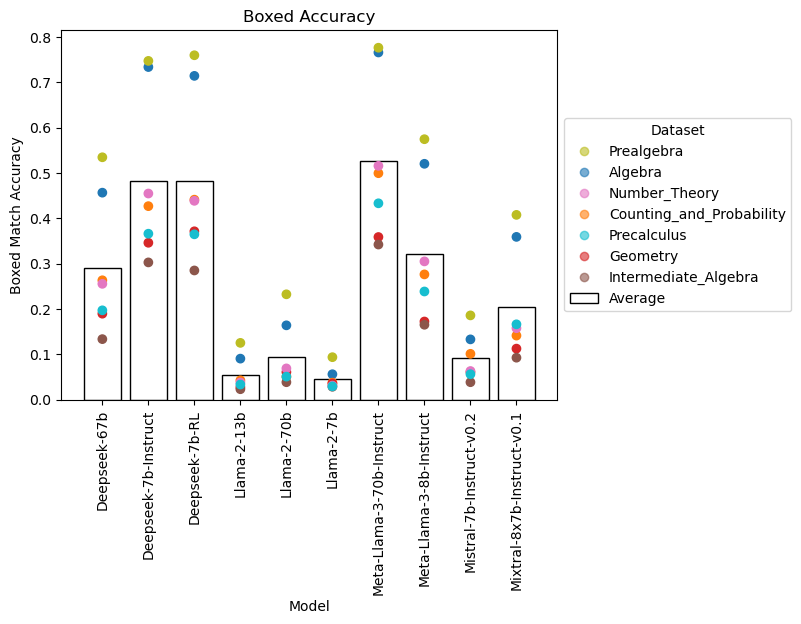

In [531]:
# plot the results
import matplotlib.pyplot as plt

boxed_accuracy = boxed_match.groupby(['model', 'dataset'])['boxed_match'].mean()
model_accuracy = boxed_accuracy.groupby('model').mean()
dataset_accuracy = boxed_accuracy.groupby('dataset').mean()

plt.bar(model_accuracy.index, model_accuracy, edgecolor='black', linewidth=1, color='none')

# plot each dataset as a separate point with model on the x axis and boxed_match on the y axis
colors = pd.Categorical(boxed_accuracy.index.get_level_values('dataset'))
scatter = plt.scatter(boxed_accuracy.index.get_level_values('model'), boxed_accuracy, c=colors.codes, cmap='tab10')
plt.xlabel('Model')
plt.ylabel('Boxed Match Accuracy')
plt.title('Boxed Accuracy')
handles, labels = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
labels = [colors.categories[int(label)].replace('_train', '') for label in labels]

# sort the legend by the average accuracy
sorted_idxs = dataset_accuracy.sort_values(ascending=False).index
handles = [handles[colors.categories.get_loc(dataset)] for dataset in sorted_idxs]
labels = [labels[colors.categories.get_loc(dataset)] for dataset in sorted_idxs]

# add bars to the legend
handles.append(plt.Rectangle((0, 0), 1, 1, fc='none', edgecolor='black'))
labels.append('Average')

plt.legend(
    handles, labels,
    title='Dataset',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
plt.xticks(rotation=90)

plt.show()

In [532]:
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,model,i
0,Intermediate_Algebra_train,0.866672,0.883936,0.926820,0.940142,0.007688,0.021443,0.837015,0.950049,0.817315,...,0.912081,0.038860,0.132064,0.006257,0.435875,2.630440e-05,0.691396,0.393945,Llama-2-13b,0
1,Intermediate_Algebra_train,0.787936,0.792745,0.880210,0.919622,0.089928,0.120155,0.850792,0.967151,0.842138,...,0.924528,0.976061,0.979162,0.143243,0.333758,5.214633e-03,0.891017,0.840735,Deepseek-7b-Instruct,0
2,Intermediate_Algebra_train,0.794181,0.827046,0.954842,0.926436,0.027937,0.106478,0.852607,0.958546,0.800642,...,0.947195,0.882636,0.610345,0.039236,0.365567,3.332583e-04,0.962997,0.916651,Deepseek-67b,0
3,Intermediate_Algebra_train,0.713829,0.760838,0.952237,0.936189,0.004424,0.057520,0.902177,0.953419,0.797390,...,0.957362,0.512222,0.960494,0.112149,0.351688,4.100295e-03,0.937511,0.834631,Meta-Llama-3-8b-Instruct,0
4,Intermediate_Algebra_train,0.838457,0.834677,0.939746,0.916141,0.022885,0.036429,0.846742,0.965180,0.834436,...,0.951724,0.491835,0.442974,0.000419,0.285289,7.178172e-07,0.850640,0.770517,Mistral-7b-Instruct-v0.2,0


In [533]:
from roscoe.score import (
    ROSCOE_SA,
    ROSCOE_SS,
    ROSCOE_LI,
    ROSCOE_LC,
    REASONING_SCORES,
    SUPERVISED_SCORES,
    UNSUPERVISED_SCORES,
)


def aggregate_roscoe_scores(roscoe_df):
    roscoe_df['ROSCOE_SA'] = roscoe_df[ROSCOE_SA].mean(axis=1)
    roscoe_df['ROSCOE_SS'] = roscoe_df[ROSCOE_SS].mean(axis=1)
    roscoe_df['ROSCOE_LI'] = roscoe_df[ROSCOE_LI].mean(axis=1)
    roscoe_df['ROSCOE_LC'] = roscoe_df[ROSCOE_LC].mean(axis=1)
    roscoe_df['ROSCOE'] = roscoe_df[REASONING_SCORES].mean(axis=1)
    roscoe_df['ROSCOE_supervised'] = roscoe_df[SUPERVISED_SCORES].mean(axis=1)
    roscoe_df['ROSCOE_unsupervised'] = roscoe_df[UNSUPERVISED_SCORES].mean(axis=1)

    return roscoe_df


roscoe_df = aggregate_roscoe_scores(roscoe_df)
roscoe_df.head()

,dataset,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,grammar_step_max,model,i,ROSCOE_SA,ROSCOE_SS,ROSCOE_LI,ROSCOE_LC,ROSCOE,ROSCOE_supervised,ROSCOE_unsupervised
0,Intermediate_Algebra_train,0.866672,0.883936,0.926820,0.940142,0.007688,0.021443,0.837015,0.950049,0.817315,...,0.393945,Llama-2-13b,0,0.792808,0.620115,0.085462,0.305500,0.574343,0.877389,0.411163
1,Intermediate_Algebra_train,0.787936,0.792745,0.880210,0.919622,0.089928,0.120155,0.850792,0.967151,0.842138,...,0.840735,Deepseek-7b-Instruct,0,0.789719,0.641631,0.977611,0.442794,0.699564,0.890213,0.596907
2,Intermediate_Algebra_train,0.794181,0.827046,0.954842,0.926436,0.027937,0.106478,0.852607,0.958546,0.800642,...,0.916651,Deepseek-67b,0,0.790559,0.669505,0.746490,0.456957,0.684593,0.896740,0.570360
3,Intermediate_Algebra_train,0.713829,0.760838,0.952237,0.936189,0.004424,0.057520,0.902177,0.953419,0.797390,...,0.834631,Meta-Llama-3-8b-Instruct,0,0.777501,0.655707,0.736358,0.448016,0.672746,0.902442,0.549064
4,Intermediate_Algebra_train,0.838457,0.834677,0.939746,0.916141,0.022885,0.036429,0.846742,0.965180,0.834436,...,0.770517,Mistral-7b-Instruct-v0.2,0,0.775610,0.642633,0.467404,0.381373,0.626284,0.870809,0.494616


In [444]:
tf.columns

Index(['dataset', 'i', 'problem', 'level', 'type', 'solution', 'boxed',
       'model', 'method', 'generation_args', 'tfa', 'tfce', 'perpelexity',
       'sumCE', 'bpc', 'total_num_tokens', 'prompt_num_tokens',
       'solution_num_tokens', 'total_num_chars', 'prompt_num_chars',
       'solution_num_chars'],
      dtype='object')

In [639]:
tf[['model', 'dataset', 'i']]

,model,dataset,i
0,Mixtral-8x22b-Instruct-v0.1,Counting_and_Probability_train,0
1,Gemma-1.1-7b-Instruct,Counting_and_Probability_train,0
2,LLeMMA-34b,Counting_and_Probability_train,0
3,Abel-7b,Counting_and_Probability_train,0
4,Llama-2-13b,Counting_and_Probability_train,0
...,...,...,...
411,Meta-Llama-3-8b-Instruct,Algebra_train,31
412,Mistral-7b-Instruct-v0.2,Algebra_train,31
413,Llama-2-70b,Algebra_train,31
414,Llama-2-7b,Algebra_train,31


/tmp/user/21882/ipykernel_3595343/1170800951.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/tmp/user/21882/ipykernel_3595343/1170800951.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/tmp/user/21882/ipykernel_3595343/1170800951.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/tmp/user/21882/ipykernel_3595343/1170800951.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)


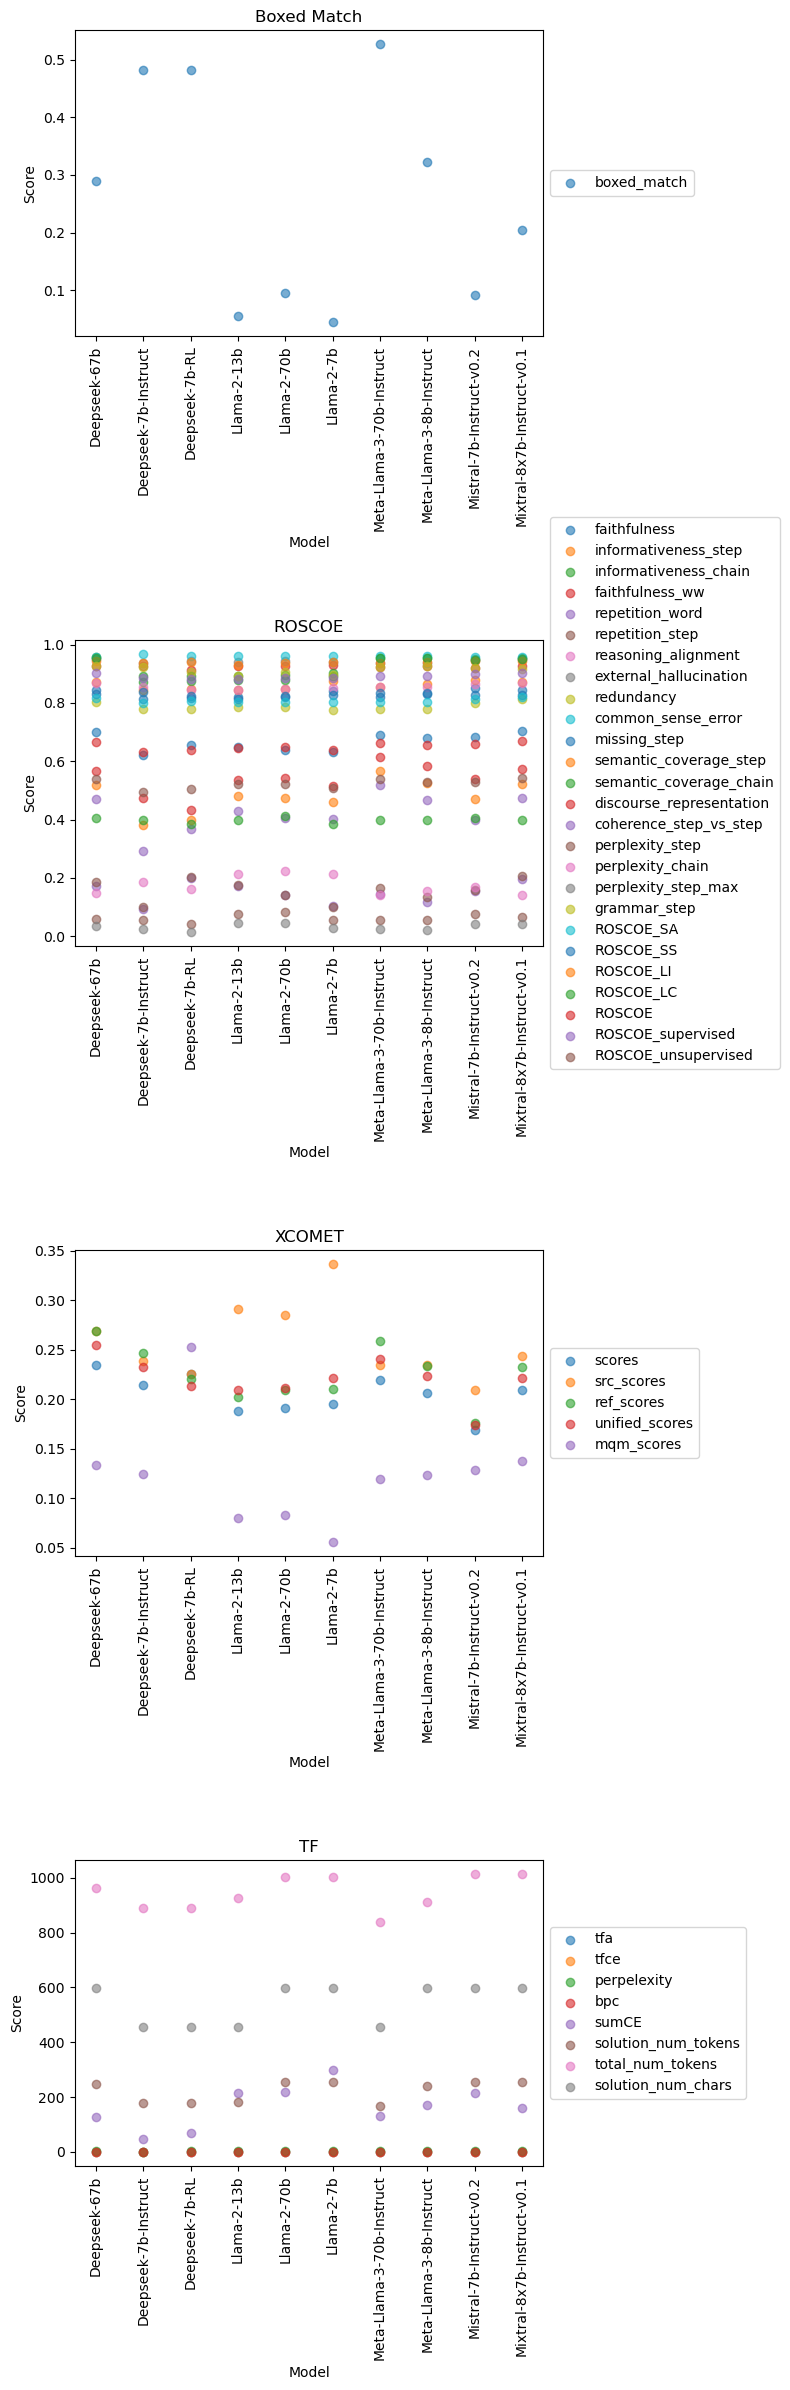

In [534]:
# plot metrics
import matplotlib.pyplot as plt

# group by model
boxed_match_grouped = boxed_match.groupby(['model', 'dataset'])[['boxed_match']].mean()
roscoe_grouped = roscoe_df.groupby(['model', 'dataset'])[
    ['faithfulness', 'informativeness_step',
     'informativeness_chain', 'faithfulness_ww', 'repetition_word',
     'repetition_step', 'reasoning_alignment', 'external_hallucination',
     'redundancy', 'common_sense_error', 'missing_step',
     'semantic_coverage_step', 'semantic_coverage_chain',
     'discourse_representation', 'coherence_step_vs_step', 'perplexity_step',
     'perplexity_chain', 'perplexity_step_max', 'grammar_step',
     'ROSCOE_SA', 'ROSCOE_SS', 'ROSCOE_LI', 'ROSCOE_LC',
     'ROSCOE', 'ROSCOE_supervised', 'ROSCOE_unsupervised']
].mean()
xcomet_grouped = xcomet_df.groupby(['model', 'dataset'])[
    ['scores', 'src_scores', 'ref_scores', 'unified_scores', 'mqm_scores']].mean()
# drop models that are not in xcomet model column
tf_filtered = tf[tf['model'].isin(xcomet_grouped.index.get_level_values('model'))]
tf_grouped = tf_filtered.groupby(['model', 'dataset'])[
    ['tfa', 'tfce', 'perpelexity', 'bpc', 'sumCE', 'solution_num_tokens', 'total_num_tokens',
     'solution_num_chars']].mean()

# plot the metrics
fig, ax = plt.subplots(4, 1, figsize=(8, 4 * 6))

for i, (grouped, title) in enumerate(
        zip([boxed_match_grouped, roscoe_grouped, xcomet_grouped, tf_grouped],
            ['Boxed Match', 'ROSCOE', 'XCOMET', 'TF'])):
    grouped = grouped.groupby('model').mean()
    for metric in grouped.columns:
        ax[i].scatter(grouped.index, grouped[metric], label=metric, alpha=0.6)

    ax[i].set_xlabel('Model')
    ax[i].set_ylabel('Score')
    ax[i].set_title(title)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [535]:
# plot metric against boxed_accuracy
def plot_metric_vs_metric_by_model(metric1, metric2, metric1_name='Metric 1', metric2_name='Metric 2',
                                   title=None):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    # plot the metrics
    colors = pd.Categorical(metric2.index)
    scatter = ax.scatter(metric1, metric2, c=colors.codes, cmap='tab10', alpha=0.6)

    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.set_title(title if title is not None else f'{metric1_name} vs {metric2_name}')

    handles, labels = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
    labels = [colors.categories[int(label)].replace('_train', '') for label in labels]

    plt.legend(
        handles, labels,
        title='Model',
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

    plt.show()


# plot metric against boxed_accuracy
def plot_metric_vs_metric_by_dataset(metric1, metric2, metric1_name='Metric 1', metric2_name='Metric 2',
                                     title=None):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    # plot the metrics
    colors = pd.Categorical(metric2.index)
    scatter = ax.scatter(metric1, metric2, c=colors.codes, cmap='tab10', alpha=0.6)

    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.set_title(title if title is not None else f'{metric1_name} vs {metric2_name}')

    handles, labels = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
    labels = [colors.categories[int(label)].replace('_train', '') for label in labels]

    plt.legend(
        handles, labels,
        title='Dataset',
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

    plt.show()


# https://github.com/matplotlib/matplotlib/issues/11155
def mscatter(x, y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax = plt.gca()
    sc = ax.scatter(x, y, **kw)
    if (m is not None) and (len(m) == len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc


# plot metric against boxed_accuracy
def plot_metric_vs_metric_by_model_and_dataset(metric1, metric2, metric1_name='Metric 1', metric2_name='Metric 2',
                                               title=None):
    # set color by model
    # set marker shape by dataset
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    # plot the metrics
    colors = pd.Categorical(metric1.index.get_level_values('dataset'))
    markers = pd.Categorical(metric1.index.get_level_values('model'))
    marker_map = {
        0: 'o',
        1: 's',
        2: 'D',
        3: '^',
        4: 'p',
        5: 'P',
        6: '*',
        7: 'x',
        8: '1',
        9: 'h',
        10: '3',
        11: '+',
        12: 'd',
        13: '|',
        14: '_',
        15: '<',
    }
    scatter = mscatter(metric1, metric2, c=colors.codes, cmap='tab10', alpha=0.6,
                       m=[marker_map[marker] for marker in markers.codes])

    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.set_title(title if title is not None else f'{metric1_name} vs {metric2_name}')

    handles_c, labels_c = scatter.legend_elements(prop='colors', alpha=0.6, fmt='{x:.0f}')
    labels_c = [colors.categories[int(label)].replace('_train', '') for label in labels_c]

    handles_m = [plt.scatter([], [], marker=marker, color='black', label=marker) for marker in marker_map.values()]
    labels_m = [label.replace('_train', '') for label in markers.categories]

    handles = handles_c + handles_m
    labels = labels_c + labels_m

    plt.legend(
        handles, labels,
        title='Model',
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )

    plt.show()

In [472]:
tf_grouped.columns

Index(['tfa', 'tfce', 'perpelexity', 'bpc', 'sumCE', 'solution_num_tokens',
       'total_num_tokens'],
      dtype='object')

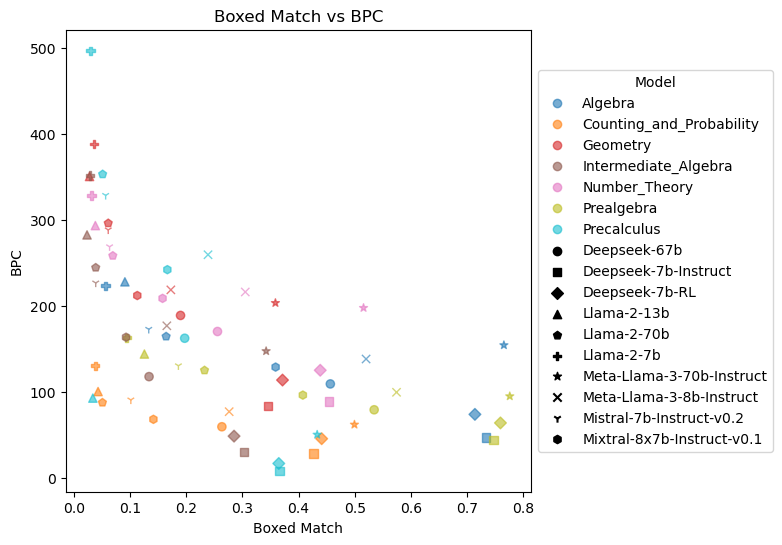

In [536]:
temp = boxed_match_grouped[
    boxed_match_grouped.index.get_level_values('model').isin(tf_grouped.index.get_level_values('model'))]
plot_metric_vs_metric_by_model_and_dataset(temp['boxed_match'], tf_grouped['sumCE'], 'Boxed Match', 'BPC')

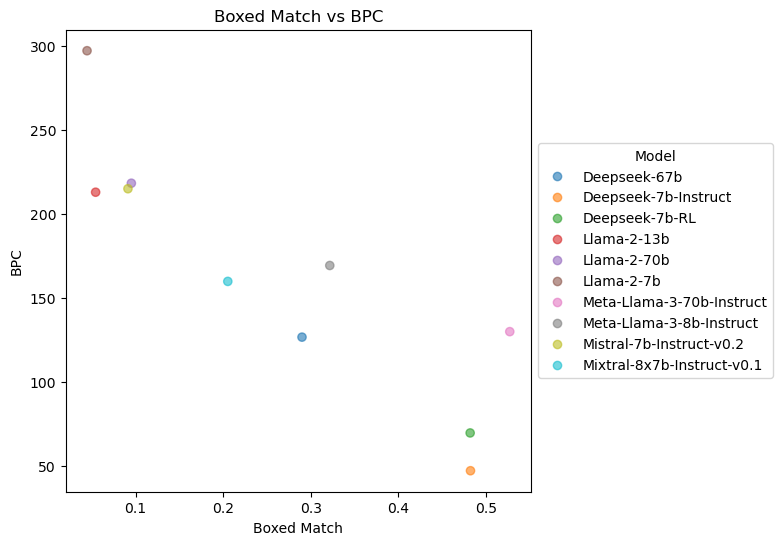

In [516]:
temp = boxed_match_grouped[
    boxed_match_grouped.index.get_level_values('model').isin(tf_grouped.index.get_level_values('model'))]
plot_metric_vs_metric_by_model(temp.groupby('model').mean()['boxed_match'],
                               tf_grouped.groupby('model').mean()['sumCE'], 'Boxed Match', 'BPC')

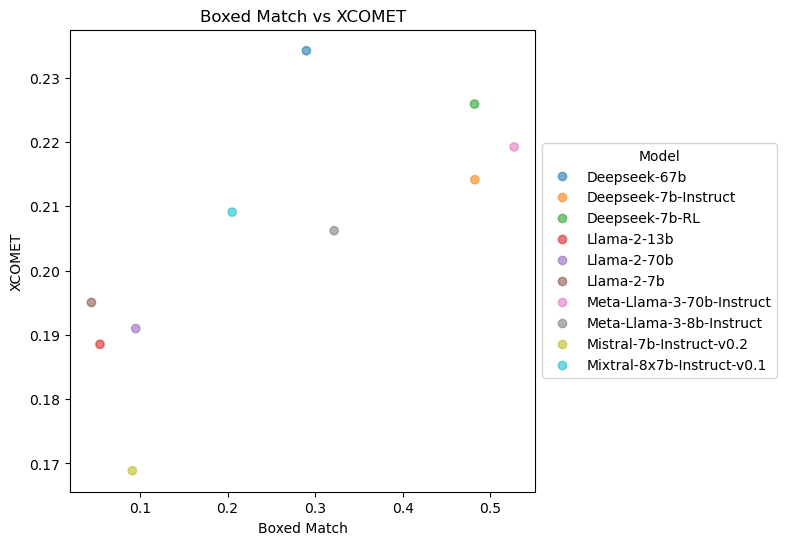

In [504]:
plot_metric_vs_metric_by_model(boxed_match_grouped.groupby('model').mean()['boxed_match'],
                               xcomet_grouped.groupby('model').mean()['scores'], 'Boxed Match', 'XCOMET')

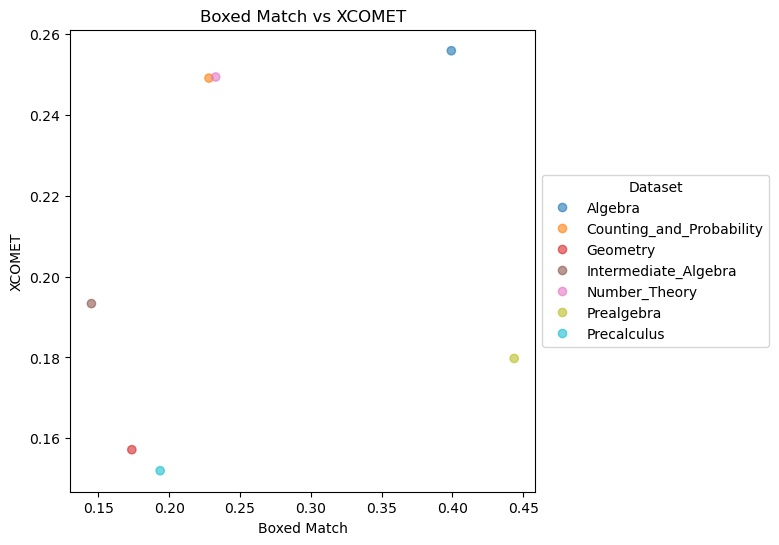

In [133]:
plot_metric_vs_metric_by_dataset(boxed_match_grouped.groupby('dataset').mean()['boxed_match'],
                                 xcomet_grouped.groupby('dataset').mean()['scores'], 'Boxed Match', 'XCOMET')

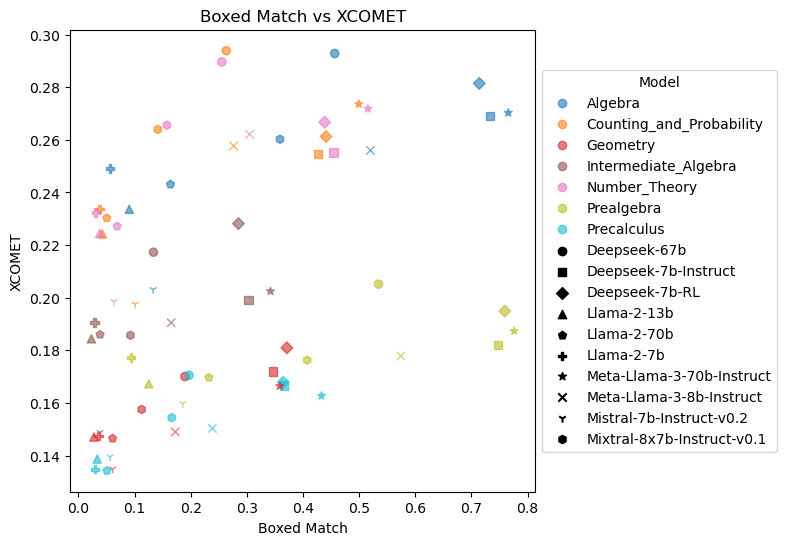

In [213]:
# 'scores', 'src_scores', 'ref_scores', 'unified_scores', 'mqm_scores'
m = 'scores'

plot_metric_vs_metric_by_model_and_dataset(boxed_match_grouped['boxed_match'], xcomet_grouped[m], 'Boxed Match',
                                           'XCOMET')

In [612]:
# calculation correlation between boxed_match and xcomet for each dataset
corrs = {}
for dataset in boxed_match_grouped.index.get_level_values('dataset').unique():
    boxed_match_dataset = boxed_match_grouped.query(f'dataset == "{dataset}"')['boxed_match']

    print(f'{dataset}:')
    for m in roscoe_grouped.columns:
        roscoe_dataset = roscoe_grouped.query(f'dataset == "{dataset}"')[m]
        correlation = boxed_match_dataset.corr(roscoe_dataset)
        corrs[m] = corrs.get(m, []) + [correlation]
        # print(f'{dataset} {m}:\n{correlation:.3f}')
        print(f'{correlation:.3f}, ', end='')
    print()
    # xcomet_dataset = roscoe_grouped.query(f'dataset == "{dataset}"')['ROSCOE_aggregated']
    #
    # correlation = boxed_match_dataset.corr(xcomet_dataset)
    # # corrs.append(correlation)
    # print(f'{dataset}:\n{correlation:.3f}')

print(f'Averages:')
for m, c in corrs.items():
    print(f'{m}: {sum(c) / len(c):.3f}')

Algebra_train:
-0.172, -0.003, 0.089, -0.092, -0.455, -0.371, 0.280, -0.074, -0.174, 0.558, 0.713, 0.446, 0.131, -0.271, -0.327, -0.778, -0.592, -0.819, 0.600, -0.198, -0.113, -0.313, -0.307, -0.305, 0.283, -0.397, -0.113, 
Counting_and_Probability_train:
-0.860, -0.768, 0.162, -0.573, 0.330, 0.395, -0.077, -0.437, -0.428, 0.369, 0.426, 0.161, 0.211, 0.154, 0.273, -0.793, -0.551, -0.861, 0.590, -0.134, 0.352, 0.219, 0.103, 0.238, 0.082, 0.253, -0.252, 
Geometry_train:
-0.764, -0.759, -0.015, -0.672, 0.305, 0.452, -0.155, -0.250, -0.301, 0.407, 0.453, -0.035, 0.041, -0.074, -0.040, -0.532, -0.491, -0.701, 0.486, -0.240, 0.166, -0.059, 0.071, -0.008, -0.033, -0.003, 0.165, 
Intermediate_Algebra_train:
-0.380, -0.331, -0.031, -0.290, 0.233, 0.299, -0.118, -0.361, -0.230, 0.306, 0.071, -0.269, 0.023, -0.028, 0.214, -0.622, -0.654, -0.599, 0.454, -0.095, 0.158, 0.124, -0.475, -0.029, -0.100, -0.008, 0.068, 
Number_Theory_train:
-0.571, -0.417, 0.096, -0.445, 0.189, 0.236, -0.093, -0.495, -0

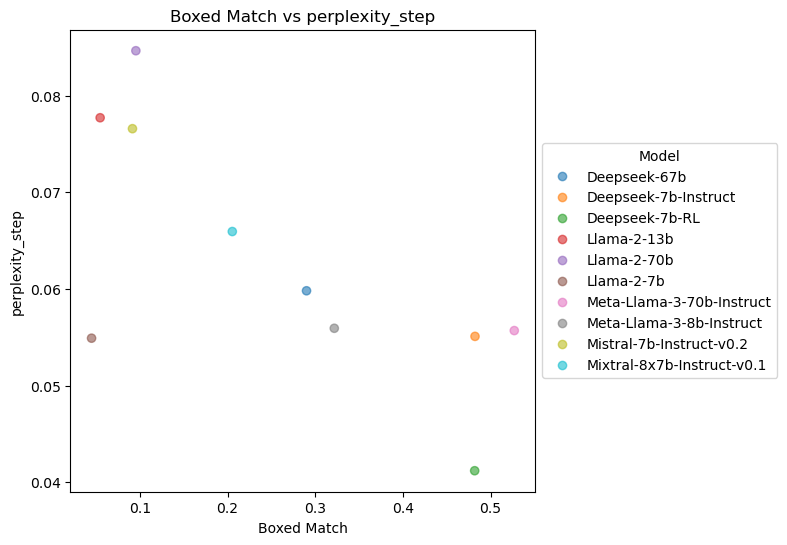

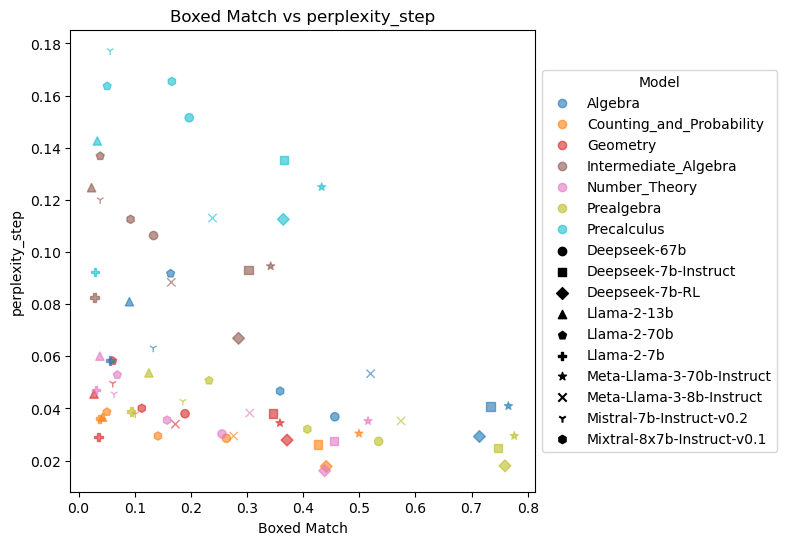

In [636]:
# plot_metric_vs_metric_by_model(boxed_match_grouped.groupby('model').mean()['boxed_match'],
#                                roscoe_grouped.groupby('model').mean()['perplexity_step_max'], 'Boxed Match', 'ROSCOE Perplexity Step Max')
# 
# plot_metric_vs_metric_by_model_and_dataset(boxed_match_grouped['boxed_match'], roscoe_grouped['perplexity_step_max'],
#                                            'Boxed Match', 'ROSCOE Perplexity Step Max')

plot_metric_vs_metric_by_model(boxed_match_grouped.groupby('model').mean()['boxed_match'],
                               roscoe_grouped.groupby('model').mean()['perplexity_step'], 'Boxed Match',
                               'perplexity_step')

plot_metric_vs_metric_by_model_and_dataset(boxed_match_grouped['boxed_match'], roscoe_grouped['perplexity_step'],
                                           'Boxed Match', 'perplexity_step')

In [588]:
??LogisticRegression

In [633]:
# try to predict boxed match from roscoe using linear model with L1 regularization
# we are going to do binary classification
from sklearn.linear_model import Lasso#, LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
# model = Lasso(alpha=0.001)
# drop all columns that contain 'ROSCOE_aggregated'
roscoe_grouped = roscoe_grouped.drop(columns=[c for c in roscoe_grouped.columns if 'ROSCOE_aggregated' in c],
                                     errors='ignore')

roscoe_raw = roscoe_df[list(roscoe_grouped.columns) + ['dataset', 'model']]
boxed_match_raw = boxed_match[list(boxed_match_grouped.columns) + ['dataset', 'model']]

# set dataset and model as index
roscoe_raw = roscoe_raw.set_index(['dataset', 'model'])
boxed_match_raw = boxed_match_raw.set_index(['dataset', 'model'])

# X_train = roscoe_grouped.iloc[:len(boxed_match_grouped) // 4]
# y_train = boxed_match_grouped[:len(boxed_match_grouped) // 4]['boxed_match']
# 
# X_test = roscoe_grouped.iloc[len(boxed_match_grouped) // 4:]
# y_test = boxed_match_grouped[len(boxed_match_grouped) // 4:]['boxed_match']

def split_by_datasets(df, datasets):
    return df.query('dataset in @datasets'), df.query('dataset not in @datasets')


def split_by_models(df, models):
    return df.query('model not in @models'), df.query('model in @models')


# split_datasets = ['Algebra_train', 'Number_Theory_train', 'Counting_and_Probability_train', 'Geometry_train', 'Prealgebra_train', 'Precalculus_train', 'Intermediate_Algebra_train']
split_datasets = ['Algebra_train', 'Precalculus_train']

# X_train, X_test = split_by_datasets(roscoe_grouped, split_datasets)
# y_train, y_test = split_by_datasets(boxed_match_grouped, split_datasets)

# ['Deepseek-67b', 'Deepseek-7b-Instruct', 'Deepseek-7b-RL', 'Llama-2-13b',
#        'Llama-2-70b', 'Llama-2-7b', 'Meta-Llama-3-70b-Instruct',
#        'Meta-Llama-3-8b-Instruct', 'Mistral-7b-Instruct-v0.2',
#        'Mixtral-8x7b-Instruct-v0.1']
model_splits = ['Deepseek-67b']

X_train, X_test = split_by_models(roscoe_raw, model_splits)
y_train, y_test = split_by_models(boxed_match_raw, model_splits)


y_train = y_train['boxed_match']
y_test = y_test['boxed_match']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
print(f'Train score: {model.score(X_train, y_train):.3f}')
# print(f'Test score: {model.score(X_test, y_test):.3f}')
# get coefficients
coefficients = pd.Series(model.coef_.flatten(), index=X_train.columns)

roscoe_raw['ROSCOE_aggregated'] = model.predict(roscoe_raw)
roscoe_grouped['ROSCOE_aggregated'] = roscoe_raw.groupby(['model', 'dataset'])['ROSCOE_aggregated'].mean()

coefficients

Train score: 0.725


faithfulness               -2.574654
informativeness_step       -0.728381
informativeness_chain       0.224043
faithfulness_ww            -5.414620
repetition_word            -3.385244
repetition_step             3.949556
reasoning_alignment         4.416457
external_hallucination      2.903579
redundancy                 -2.888767
common_sense_error         -2.092622
missing_step                1.289649
semantic_coverage_step     -0.571740
semantic_coverage_chain    -0.484584
discourse_representation   -0.010412
coherence_step_vs_step     -0.209377
perplexity_step             2.837341
perplexity_chain           -1.875449
perplexity_step_max        -4.128165
grammar_step                2.496959
ROSCOE_SA                   0.000000
ROSCOE_SS                   0.000000
ROSCOE_LI                  -0.002115
ROSCOE_LC                   0.000000
ROSCOE                      0.000000
ROSCOE_supervised           0.000000
ROSCOE_unsupervised         0.000000
dtype: float64

In [630]:
roscoe_raw['ROSCOE_aggregated']

dataset                     model                     
Intermediate_Algebra_train  Llama-2-13b                   False
                            Deepseek-7b-Instruct          False
                            Deepseek-67b                  False
                            Meta-Llama-3-8b-Instruct      False
                            Mistral-7b-Instruct-v0.2      False
                                                          ...  
Geometry_train              Llama-2-70b                   False
                            Llama-2-7b                    False
                            Mixtral-8x7b-Instruct-v0.1    False
                            Deepseek-7b-RL                False
                            Meta-Llama-3-70b-Instruct     False
Name: ROSCOE_aggregated, Length: 75000, dtype: bool

In [631]:
roscoe_raw.groupby(['dataset', 'model'])['ROSCOE_aggregated'].mean()

dataset            model                     
Algebra_train      Deepseek-67b                  0.001147
                   Deepseek-7b-Instruct          0.000000
                   Deepseek-7b-RL                0.000573
                   Llama-2-13b                   0.000000
                   Llama-2-70b                   0.000573
                                                   ...   
Precalculus_train  Llama-2-7b                    0.000000
                   Meta-Llama-3-70b-Instruct     0.001340
                   Meta-Llama-3-8b-Instruct      0.004021
                   Mistral-7b-Instruct-v0.2      0.002681
                   Mixtral-8x7b-Instruct-v0.1    0.001340
Name: ROSCOE_aggregated, Length: 70, dtype: float64

In [285]:
[x for x in model.coef_]

[-2.1386594109102757,
 -0.0,
 -4.658621586672356,
 -0.0,
 -1.5772208159191115,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -8.745627038326795,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0]

In [593]:
# compute aggregated roscoe using coeff from lasso
roscoe_grouped = roscoe_grouped.drop(columns='ROSCOE_aggregated', errors='ignore')
import numpy as np

# model.coef_ = np.array([
#     -3.0,
#     0.0,
#     -2.0,
#     0.0,
#     0.0,
#     1.0,
#     0.0,
#     0.0,
#     -1.5,
#     0.0,
#     7.5,
#     0.0,
#     0.0,
#     0.5,
#     -0.5,
#     -1.0,
#     -3.0,
#     0.0,
#     3.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0,
#     0.0
# ])

# model.coef_ = np.array([
#     -3.0,
#     -0.0,
#     -1.0,
#     -0.0,
#     0.0,
#     0.2,
#     -0.0,
#     -0.0,
#     -0.0,
#     0.0,
#     5.5,
#     -0.0,
#     -0.0,
#     0.0,
#     -0.0,
#     -0.0,
#     -3.0,
#     -0.0,
#     0.0,
#     -0.0,
#     -0.0,
#     -0.0,
#     0.0,
#     -0.0,
#     -0.0,
#     -0.0])
roscoe_grouped['ROSCOE_aggregated'] = model.predict(roscoe_grouped)
roscoe_grouped.head()

faithfulness  \
model        dataset                                        
Deepseek-67b Algebra_train                       0.851655   
             Counting_and_Probability_train      0.836069   
             Geometry_train                      0.833377   
             Intermediate_Algebra_train          0.852190   
             Number_Theory_train                 0.842366   

                                             informativeness_step  \
model        dataset                                                
Deepseek-67b Algebra_train                               0.880362   
             Counting_and_Probability_train              0.862425   
             Geometry_train                              0.856417   
             Intermediate_Algebra_train                  0.880011   
             Number_Theory_train                         0.876977   

                                             informativeness_chain  \
model        dataset                                                 
Deepseek-67b Algebra_train                                0.963490   
             Counting_and_Probability_train               0.954095   
             Geometry_train                               0.946115   
             Intermediate_Algebra_train                   0.959876   
             Number_Theory_train                          0.959346   

                                             faithfulness_ww  repetition_word  \
model        dataset                                                            
Deepseek-67b Algebra_train                          0.936589         0.141720   
             Counting_and_Probability_train         0.928996         0.077720   
             Geometry_train                         0.920847         0.063444   
             Intermediate_Algebra_train             0.925100         0.290010   
             Number_Theory_train                    0.929124         0.089624   

                                             repetition_step  \
model        dataset                                           
Deepseek-67b Algebra_train                          0.150065   
             Counting_and_Probability_train         0.088373   
             Geometry_train                         0.078926   
             Intermediate_Algebra_train             0.304949   
             Number_Theory_train                    0.095117   

                                             reasoning_alignment  \
model        dataset                                               
Deepseek-67b Algebra_train                              0.877173   
             Counting_and_Probability_train             0.867877   
             Geometry_train                             0.850919   
             Intermediate_Algebra_train                 0.873834   
             Number_Theory_train                        0.867759   

                                             external_hallucination  \
model        dataset                                                  
Deepseek-67b Algebra_train                                 0.951891   
             Counting_and_Probability_train                0.947439   
             Geometry_train                                0.941870   
             Intermediate_Algebra_train                    0.953568   
             Number_Theory_train                           0.948233   

                                             redundancy  common_sense_error  \
model        dataset                                                          
Deepseek-67b Algebra_train                     0.805890            0.966108   
             Counting_and_Probability_train    0.798230            0.957293   
             Geometry_train                    0.777314            0.952830   
             Intermediate_Algebra_train        0.815937            0.959376   
             Number_Theory_train               0.796193            0.953259   

                                             ...  perplexity_step_max  \
model        dataset   

In [418]:
len([c for c in roscoe_grouped.columns if 'ROSCOE_aggregated' not in c and 'ROSCOE' not in c])

19

In [413]:
def fit_roscoe_on_dataset(datasets, roscoe_grouped):
    if not isinstance(datasets, list):
        datasets = [datasets]

    allowed_columns = [c for c in roscoe_grouped.columns if 'ROSCOE_aggregated' not in c]

    X_train, X_test = split_by_datasets(roscoe_grouped[allowed_columns], datasets)
    y_train, y_test = split_by_datasets(boxed_match_grouped, datasets)

    y_train = y_train['boxed_match']
    y_test = y_test['boxed_match']

    model.fit(X_train, y_train)
    print(f'{dataset} Train score: {model.score(X_train, y_train):.3f}')
    print(f'{dataset} Test score: {model.score(X_test, y_test):.3f}')
    name = '_'.join(datasets)
    roscoe_grouped[f'ROSCOE_aggregated_{name}'] = model.predict(roscoe_grouped[allowed_columns])
    return roscoe_grouped


for dataset in boxed_match_grouped.index.get_level_values('dataset').unique():
    roscoe_grouped = fit_roscoe_on_dataset(dataset, roscoe_grouped)

Algebra_train Train score: 0.822
Algebra_train Test score: -3.620
Counting_and_Probability_train Train score: 0.726
Counting_and_Probability_train Test score: -0.104
Geometry_train Train score: 0.663
Geometry_train Test score: -0.450
Intermediate_Algebra_train Train score: 0.735
Intermediate_Algebra_train Test score: 0.292
Number_Theory_train Train score: 0.696
Number_Theory_train Test score: -1.001
Prealgebra_train Train score: 0.838
Prealgebra_train Test score: -6.135
Precalculus_train Train score: 0.845
Precalculus_train Test score: -1.848


In [369]:
roscoe_grouped.head()

faithfulness  \
model        dataset                                        
Deepseek-67b Algebra_train                       0.851666   
             Counting_and_Probability_train      0.836078   
             Geometry_train                      0.833386   
             Intermediate_Algebra_train          0.852190   
             Number_Theory_train                 0.842366   

                                             informativeness_step  \
model        dataset                                                
Deepseek-67b Algebra_train                               0.880366   
             Counting_and_Probability_train              0.862426   
             Geometry_train                              0.856417   
             Intermediate_Algebra_train                  0.880011   
             Number_Theory_train                         0.876977   

                                             informativeness_chain  \
model        dataset                                                 
Deepseek-67b Algebra_train                                0.963489   
             Counting_and_Probability_train               0.954090   
             Geometry_train                               0.946108   
             Intermediate_Algebra_train                   0.959876   
             Number_Theory_train                          0.959346   

                                             faithfulness_ww  repetition_word  \
model        dataset                                                            
Deepseek-67b Algebra_train                          0.936588         0.141722   
             Counting_and_Probability_train         0.928996         0.077718   
             Geometry_train                         0.920846         0.063446   
             Intermediate_Algebra_train             0.925100         0.290010   
             Number_Theory_train                    0.929124         0.089624   

                                             repetition_step  \
model        dataset                                           
Deepseek-67b Algebra_train                          0.150064   
             Counting_and_Probability_train         0.088374   
             Geometry_train                         0.078929   
             Intermediate_Algebra_train             0.304949   
             Number_Theory_train                    0.095117   

                                             reasoning_alignment  \
model        dataset                                               
Deepseek-67b Algebra_train                              0.877172   
             Counting_and_Probability_train             0.867869   
             Geometry_train                             0.850910   
             Intermediate_Algebra_train                 0.873834   
             Number_Theory_train                        0.867759   

                                             external_hallucination  \
model        dataset                                                  
Deepseek-67b Algebra_train                                 0.951896   
             Counting_and_Probability_train                0.947443   
             Geometry_train                                0.941875   
             Intermediate_Algebra_train                    0.953568   
             Number_Theory_train                           0.948233   

                                             redundancy  common_sense_error  \
model        dataset                                                          
Deepseek-67b Algebra_train                     0.805892            0.966111   
             Counting_and_Probability_train    0.798223            0.957294   
             Geometry_train                    0.777312            0.952832   
             Intermediate_Algebra_train        0.815937            0.959376   
             Number_Theory_train               0.796193            0.953259   

                                             ...  \
model        dataset                        

In [414]:
# calculation correlation between boxed_match and roscoe agg for each dataset and aggregated roscoe
# rows are dataset that roscoe is trained on, columns are dataset that roscoe is tested on
corrs = pd.DataFrame(index=boxed_match_grouped.index.get_level_values('dataset').unique(),
                     columns=boxed_match_grouped.index.get_level_values('dataset').unique())

for dataset_train in boxed_match_grouped.index.get_level_values('dataset').unique():
    for dataset_test in boxed_match_grouped.index.get_level_values('dataset').unique():
        boxed_match_dataset = boxed_match_grouped.query(f'dataset == "{dataset_test}"')['boxed_match']
        roscoe_dataset = roscoe_grouped.query(f'dataset == "{dataset_test}"')[f'ROSCOE_aggregated_{dataset_train}']

        correlation = boxed_match_dataset.corr(roscoe_dataset)
        corrs.loc[dataset_train, dataset_test] = correlation

# for dataset in boxed_match_grouped.index.get_level_values('dataset').unique():
#     boxed_match_dataset = boxed_match_grouped.query(f'dataset == "{dataset}"')['boxed_match']
#     xcomet_dataset = roscoe_grouped.query(f'dataset == "{dataset}"')['ROSCOE_aggregated']
# 
#     correlation = boxed_match_dataset.corr(xcomet_dataset)
#     
#     print(f'{dataset}:\n{correlation:.3f}')


In [383]:
corrs.loc['Precalculus_train']

dataset
Algebra_train                     0.899493
Counting_and_Probability_train    0.906905
Geometry_train                    0.865965
Intermediate_Algebra_train        0.903343
Number_Theory_train               0.883443
Prealgebra_train                  0.945525
Precalculus_train                 0.954634
Name: Precalculus_train, dtype: object

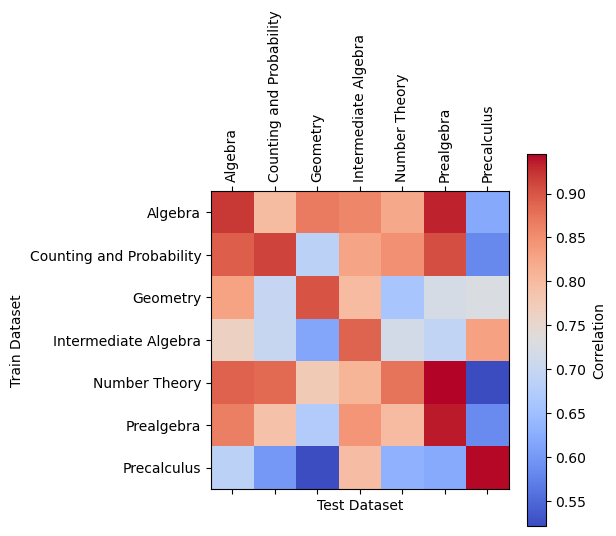

In [419]:
plt.matshow(corrs.astype(float), cmap='coolwarm')
xlabels = [d.replace('_train', '').replace('_', ' ') for d in corrs.columns]
ylabels = [d.replace('_train', '').replace('_', ' ') for d in corrs.index]
plt.xticks(range(len(corrs.columns)), xlabels, rotation=90)
plt.yticks(range(len(corrs.index)), ylabels)
plt.colorbar(
    label='Correlation'
)
plt.xlabel('Test Dataset')
plt.ylabel('Train Dataset')
plt.show()